In [11]:
import pandas as pd
data=pd.read_csv(r"C:\data\data science\Study material\NLP-Topic modeling & Text summerization\NLP-TM\Data.csv",usecols=['text'])
data.head(10)

,text
0,What @dhepburn said.
1,plus you've added commercials to the experienc...
2,I didn't today... Must mean I need to take ano...
3,"it's really aggressive to blast obnoxious ""ent..."
4,and it's a really big bad thing about it
5,seriously would pay $30 a flight for seats tha...
6,"yes, nearly every time I fly VX this __ar worm..."
7,Really missed a prime opportunity for Men With...
8,"Well, I didn't_but NOW I DO! :-D"
9,"it was amazing, and arrived an hour early. You..."


In [12]:
import re

In [14]:
HANDLE='@\w+'
link='https?://t\.co/\w+'
SPECIAL_CHARS = '&lt;|&lt;|&amp;|#'

In [15]:
def clean(text):
    text=re.sub(HANDLE,' ',text)
    text=re.sub(link,' ',text)
    text=re.sub(SPECIAL_CHARS,' ',text)
    return text

In [16]:
data['text']=data.text.apply(clean)

In [17]:
data.head(10)

,text
0,What said.
1,plus you've added commercials to the experienc...
2,I didn't today... Must mean I need to take ano...
3,"it's really aggressive to blast obnoxious ""ent..."
4,and it's a really big bad thing about it
5,seriously would pay $30 a flight for seats tha...
6,"yes, nearly every time I fly VX this __ar worm..."
7,Really missed a prime opportunity for Men With...
8,"Well, I didn't_but NOW I DO! :-D"
9,"it was amazing, and arrived an hour early. You..."


In [18]:
#LDA
from gensim.parsing.preprocessing import preprocess_string

In [19]:
data=data.text.apply(preprocess_string).tolistt()

In [20]:
data

[['said'],
 ['plu', 'ad', 'commerci', 'experi', 'tacki'],
 ['todai', 'mean', 'need', 'trip'],
 ['aggress',
  'blast',
  'obnoxi',
  'entertain',
  'guest',
  'face',
  'littl',
  'recours'],
 ['big', 'bad', 'thing'],
 ['serious', 'pai', 'flight', 'seat', 'plai', 'bad', 'thing', 'fly'],
 ['ye', 'nearli', 'time', 'fly', 'worm', 'won', 'awai'],
 ['miss', 'prime', 'opportun', 'men', 'hat', 'parodi'],
 [],
 ['amaz', 'arriv', 'hour', 'earli', 'good'],
 ['know', 'suicid', 'second', 'lead', 'caus', 'death', 'teen'],
 ['pretti', 'graphic', 'better', 'minim', 'iconographi'],
 ['great', 'deal', 'think', 'trip', 'haven', 'gone', 'trip'],
 ['fly', 'fabul', 'seduct', 'ski', 'stress', 'awai', 'travel'],
 ['thank'],
 ['sfo', 'pdx', 'schedul', 'mia'],
 ['excit',
  'cross',
  'countri',
  'flight',
  'lax',
  'mco',
  'heard',
  'great',
  'thing',
  'virgin',
  'america',
  'daystogo'],
 ['flew',
  'nyc',
  'sfo',
  'week',
  'couldn',
  'fulli',
  'sit',
  'seat',
  'larg',
  'gentleman',
  'help'],
 

In [23]:
from gensim import corpora
from gensim.models.ldamodel import LdaModel

In [24]:
dictionary=corpora.Dictionary(data)

In [27]:
corpus=[dictionary.doc2bow(text) for text in data]

In [29]:
NUM_TOPICS=5

In [30]:
ldamodel=LdaModel(corpus,num_topics=NUM_TOPICS,id2word=dictionary,passes=10)

In [31]:
ldamodel.print_topics(num_words=5)

[(0,
  '0.056*"servic" + 0.054*"custom" + 0.015*"airlin" + 0.012*"worst" + 0.012*"fly"'),
 (1,
  '0.145*"flight" + 0.043*"cancel" + 0.029*"delai" + 0.022*"hour" + 0.022*"flightl"'),
 (2,
  '0.021*"bag" + 0.018*"thank" + 0.014*"ye" + 0.013*"check" + 0.013*"like"'),
 (3,
  '0.029*"plane" + 0.028*"gate" + 0.025*"seat" + 0.013*"sit" + 0.012*"wait"'),
 (4,
  '0.041*"thank" + 0.026*"help" + 0.021*"hold" + 0.021*"phone" + 0.017*"hour"')]

In [32]:
from gensim.models.coherencemodel import CoherenceModel

In [37]:
def calculate_coherence_score(documents, dictionary, model):
    coherence_model = CoherenceModel(model=model, texts=documents, dictionary=dictionary, coherence='c_v')
    return coherence_model.get_coherence()


In [38]:
def get_coherence_values(start,stop):
    for num_topics in range (start,stop):
        print(f'\nCalculating coherence for {num_topics} topics')
        ldamodel=LdaModel(corpus,num_topics,id2word=dictionary,passes=2)
        coherence=calculate_coherence_score(data,dictionary,ldamodel)
        yield coherence

In [39]:
min_topics,max_topics=10,16

In [40]:
coherence_scores=list(get_coherence_values(min_topics,max_topics))


Calculating coherence for 10 topics

Calculating coherence for 11 topics

Calculating coherence for 12 topics

Calculating coherence for 13 topics

Calculating coherence for 14 topics

Calculating coherence for 15 topics


In [41]:
import matplotlib.pyplot as plt


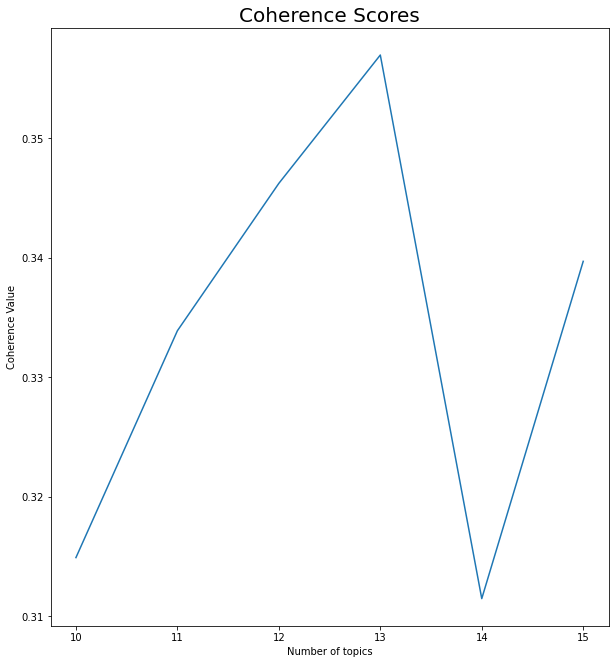

In [45]:

x = [int(i) for i in range(min_topics, max_topics)]

ax = plt.figure(figsize=(10,11))
plt.xticks(x)
plt.plot(x, coherence_scores)
plt.xlabel('Number of topics')
plt.ylabel('Coherence Value')
plt.title('Coherence Scores', fontsize=20);

In [47]:
#####LSA modelling### (Latent Semantic Analysis / Latent Semantic Indexing)

In [51]:
from gensim.models import LsiModel
from gensim.parsing.preprocessing import preprocess_string
import re

In [52]:
def clean_text(x):
    pattern=r'[^a-zA-z0-9\s]'
    x=re.sub(pattern,'',x)
    return x

In [53]:
def clean_numbers(x):
    if bool(re.search(r'\d',x)):
        x=re.sub('[0-9]{5,}','###',x)
        x = re.sub('[0-9]{4}', '####', x)
        x = re.sub('[0-9]{3}', '###', x)
        x = re.sub('[0-9]{2}', '##', x)
    return x

In [55]:
def clean(x):
    x = clean_text(x)
    x = clean_numbers(x)
    return x

In [57]:
from pathlib import Path
from bs4 import BeautifulSoup

In [60]:
def load_articles(data_dir):
    reuters = Path(data_dir)
    for path in reuters.glob('*.sgm'):   # Standard Generalized Markup Language
        with path.open() as sgm_file:
            contents = sgm_file.read()
            soup = BeautifulSoup(contents)
            for article in soup.find_all('body'):
                yield article.text

In [61]:
def load_documents(document_dir):
    print(f'Loading from {document_dir}')
    documents = list(load_articles(document_dir))
    print(f'Loaded {len(documents)} documents')
    return documents

In [62]:
def prepare_documents(documents):
    print('Preparing documents')
    documents = [clean(document) for document in documents]
    documents = [preprocess_string(doc) for doc in documents]
    return documents

In [63]:
def create_lsa_model(documents, dictionary, number_of_topics):
    print(f'Creating LSA Model with {number_of_topics} topics')
    document_terms = [dictionary.doc2bow(doc) for doc in documents]
    return LsiModel(document_terms, num_topics=number_of_topics, id2word = dictionary)

In [64]:
def run_lsa_process(documents, number_of_topics=10):
    documents = prepare_documents(documents)
    dictionary = corpora.Dictionary(documents)
    lsa_model = create_lsa_model(documents, dictionary, number_of_topics)
    return documents, dictionary, lsa_model

In [96]:
# data directory 
articles = pd.read_csv(r"C:\data\data science\Study material\NLP-Topic modeling & Text summerization\NLP-TM\Data.csv",usecols=['text'])
documents, dictionary, model = run_lsa_process(articles, number_of_topics=5)

Preparing documents
Creating LSA Model with 5 topics


In [97]:
list_of_text = articles['text'].to_list()

In [98]:
model.print_topics()
model

In [99]:
# Coherence Model
from gensim.models.coherencemodel import CoherenceModel

In [100]:
def calculate_coherence_score(documents, dictionary, model):
    coherence_model = CoherenceModel(model=model, texts=documents, dictionary=dictionary, coherence='c_v')
    return coherence_model.get_coherence()

In [101]:
def get_coherence_values(start, stop):
    for num_topics in range(start, stop):
        print(f'\nCalculating coherence for {num_topics} topics')
        documents, dictionary, model = run_lsa_process(articles, number_of_topics=num_topics)
        coherence = calculate_coherence_score(documents, dictionary, model)
        yield coherence

In [102]:
min_topics, max_topics = 5, 11

In [103]:
coherence_scores = list(get_coherence_values(min_topics, max_topics))
documents


Calculating coherence for 5 topics
Preparing documents
Creating LSA Model with 5 topics

Calculating coherence for 6 topics
Preparing documents
Creating LSA Model with 6 topics

Calculating coherence for 7 topics
Preparing documents
Creating LSA Model with 7 topics

Calculating coherence for 8 topics
Preparing documents
Creating LSA Model with 8 topics

Calculating coherence for 9 topics
Preparing documents
Creating LSA Model with 9 topics

Calculating coherence for 10 topics
Preparing documents
Creating LSA Model with 10 topics


[['text']]

Text(0.5, 1.0, 'Coherence Scores by number of Topics')

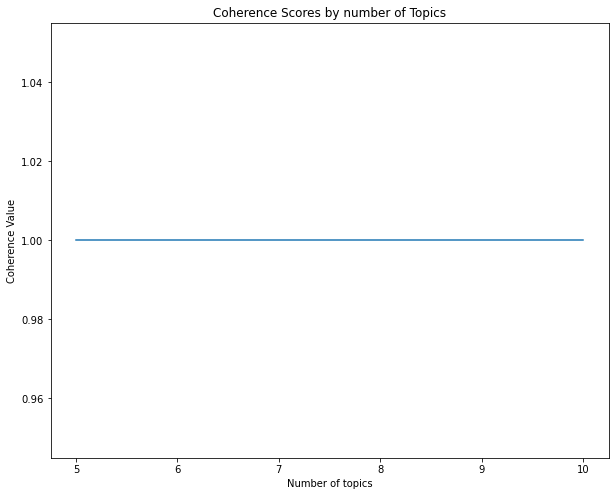

In [85]:
## Plot
import matplotlib.pyplot as plt
x = [int(i) for i in range(min_topics, max_topics)]

plt.figure(figsize=(10,8))
plt.plot(x, coherence_scores)
plt.xlabel('Number of topics')
plt.ylabel('Coherence Value')
plt.title('Coherence Scores by number of Topics')

In [86]:
###########text summarization########

In [87]:
import nltk
nltk.download('stopwords')
from collections import Counter
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from string import punctuation
from heapq import nlargest

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chinni\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [88]:
STOPWORDS = set(stopwords.words('english') + list(punctuation))
MIN_WORD_PROP, MAX_WORD_PROP = 0.1, 0.9

In [89]:
def compute_word_frequencies(word_sentences):
    words = [word for sentence in word_sentences 
                     for word in sentence 
                         if word not in STOPWORDS]
    counter = Counter(words)
    limit = float(max(counter.values()))
    word_frequencies = {word: freq/limit 
                                for word,freq in counter.items()}
    # Drop words if too common or too uncommon
    word_frequencies = {word: freq 
                            for word,freq in word_frequencies.items() 
                                if freq > MIN_WORD_PROP 
                                and freq < MAX_WORD_PROP}
    return word_frequencies

In [90]:
def sentence_score(word_sentence, word_frequencies):
    return sum([ word_frequencies.get(word,0) 
                    for word in word_sentence])

In [91]:
def summarize(text:str, num_sentences=3):
    """
    Summarize the text, by return the most relevant sentences
     :text the text to summarize
     :num_sentences the number of sentences to return
    """
    text = text.lower() # Make the text lowercase
    
    sentences = sent_tokenize(text) # Break text into sentences 
    
    # Break sentences into words
    word_sentences = [word_tokenize(sentence) for sentence in sentences]
    
    # Compute the word frequencies
    word_frequencies = compute_word_frequencies(word_sentences)
    
    # Calculate the scores for each of the sentences
    scores = [sentence_score(word_sentence, word_frequencies) for word_sentence in word_sentences]
    sentence_scores = list(zip(sentences, scores))
    
    # Rank the sentences
    top_sentence_scores = nlargest(num_sentences, sentence_scores, key=lambda t: t[1])
    
    # Return the top sentences
    return [t[0] for t in top_sentence_scores]

In [112]:
articles = pd.read_csv(r"C:\data\data science\Study material\NLP-Topic modeling & Text summerization\NLP-TM\Data.csv",usecols=['text'])

In [106]:
list_of_text = articles['text'].to_list()

In [107]:
# Function to convert   
def listToString(s):  
    
    # initialize an empty string 
    str1 = ""  
    
    # traverse in the string   
    for ele in s:  
        str1 += ele   
    
    # return string   
    return str1  

In [108]:
list_of_text= (listToString(list_of_text))

In [109]:
len(sent_tokenize(list_of_text))

15008

In [110]:
summarize(list_of_text)

["phone will be out of batteries soon.40 minutes still haven't talked to one person #shocking phone is gonna died before i talk to anyone http://t.co/iwoigrlhxbflight 4315 (n231wn) taxis at @flytpa prior to flight to @fly_nashville http://t.co/idra8kenoh at fort launder dale and the gate agent can't switch flights to an earlier flight but we can on our phone...ridiculousso why is every single flight out of @portcolumbuscmh cancelled flightled for only your airline?cancelled flightled my flight won't refund me and told me 2 call customer service n been holding for 30 minutes still waitin #badservicei'm going to need you to answer your phones.",
 "i'm just doing what it said to do.since i am a loyal usair customer i am sure that they will make this up to me-right now i want to get home &amp; back to work.the fact we did not get notified hindered our ability to look for alternate flights before they were snapped up.you're really fudgin up with all these delays __ #justwantmybedjust discov

In [111]:
summarize(list_of_text, num_sentences=1)

["phone will be out of batteries soon.40 minutes still haven't talked to one person #shocking phone is gonna died before i talk to anyone http://t.co/iwoigrlhxbflight 4315 (n231wn) taxis at @flytpa prior to flight to @fly_nashville http://t.co/idra8kenoh at fort launder dale and the gate agent can't switch flights to an earlier flight but we can on our phone...ridiculousso why is every single flight out of @portcolumbuscmh cancelled flightled for only your airline?cancelled flightled my flight won't refund me and told me 2 call customer service n been holding for 30 minutes still waitin #badservicei'm going to need you to answer your phones."]